In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
'''We have implemented the model (Graded task: Part 1 and 2 done simultaneously).
The workload was divided equally based on the total number functions needed to build the model
The name of the person who was responsible for each function has been mentioned before each one of them.
'''

'We have implemented the model (Graded task: Part 1 and 2 done simultaneously).\nThe workload was divided equally based on the total number functions needed to build the model\nThe name of the person who was responsible for each function has been mentioned before each one of them.\n'

In [126]:
'''Rosmin: The file is imported using Pandas Library'''
data = pd.read_csv("D:\Assignments\Sem 2\Deep Learning\circles500.csv")
data = pd.DataFrame(data)

In [127]:
'''Trisha: The given dataset is seperated into features and labels'''
#split data into features and labels 
y = data["Class"]

X = data.drop(['Class'], axis = 1)

In [128]:
'''Trisha: The above dataset is then split into test and training set'''
#split data into test train set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [129]:
'''Trisha: Weights and biases initialized'''
#initializing parameters
size_x = X_train.shape[1] #size of input layer
no_of_hidden = 4 #size of hidden layer
size_y =1 #size of output layer
m = X_train.shape[0] #size of the training set
#User-defined function to enable reusability of parameters
def init_param(size_x, no_of_hidden, size_y):

    #Randomizing weights and biases
    w1 = np.random.randn(size_x,no_of_hidden) * 0.01
    b1 = np.random.randn(no_of_hidden)
    w2 = np.random.randn(no_of_hidden,size_y) * 0.01
    b2 = np.random.randn(size_y)

    #creating a dictionary to store the weights
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    return parameters


In [130]:
'''Rosmin: defining sigmoid and derivative of sigmoid function'''
def sigmoid(Z):
    s = 1 / (1 + np.exp(-Z))
    return s

def sigmoid_d(Z):
    s = sigmoid(Z)*(1-sigmoid(Z))
    return s

In [131]:
'''Rosmin: Desigining feedforward function and calling the initialized parameters into it'''
#feedforward function

def feedforward(X_train, parameters): #takes training data (features), weights and biases as input
   
    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    z1 = np.dot(X_train,w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = sigmoid(z2)
    
    return(z1,z2,a1,a2)


In [132]:
'''Trisha: Refining the output from the parameters using backpropogation'''
def backprop(parameters,error,ff_output,X_train,alpha):
    delta=error.reshape(400,1)*sigmoid_d(ff_output[1])
    
    parameters['w2']= parameters['w2']+np.dot(ff_output[1].T,delta)*alpha
    
    delta_h=np.dot(delta,parameters['w2'].T)*sigmoid_d(ff_output[0])
    
    parameters['w1']= parameters['w1']+np.dot(X_train.T,delta_h)*alpha
    
    parameters['b2']=parameters['b2']+np.sum(delta)*alpha
    parameters['b1']=parameters['b1']+np.sum(delta_h)*alpha
    
    return(parameters)


In [133]:
'''Trisha: updating the parameters that we got after backpropogation and storing them into the initialized parameters'''
def update_init(init_param, parameters):
    init_param['w1'] = parameters['w1']
    init_param['w2'] = parameters['w2']
    init_param['b1'] = parameters['b1']
    init_param['b2'] = parameters['b2']
    
    return(init_param)

In [134]:
'''Trisha: Training the model using the defined functions and train data'''
def train(parameters,X_train,y_train):
    for i in range(10000):
        ff_output = feedforward(X_train, parameters)
        error=np.asarray(y_train-ff_output[3].reshape(400,))
        parameters_f=backprop(parameters,error,ff_output,X_train,0.0001)
        updated_param = update_init(parameters,parameters_f)
        parameters=updated_param
        if(i%1000 ==0):
            print(i,abs(np.mean(error)))
    return parameters

In [135]:
'''Trisha: Passing the updated parameters into the training model '''
parameters=init_param(size_x, no_of_hidden, size_y)
train(parameters,X_train,y_train)

0 0.11331950766669781
1000 0.006000519498545755
2000 0.00045304736420522575
3000 3.6054416143769256e-05
4000 7.3357975434040764e-06
5000 8.912701420968893e-06
6000 1.2873858304245367e-05
7000 1.703271021120223e-05
8000 2.121270371217676e-05
9000 2.53942801659246e-05


{'w1': array([[-0.00581678, -0.01662625, -0.00559908, -0.03233805],
        [ 0.01551696,  0.01554982,  0.01340722,  0.01430729]]),
 'b1': array([-0.66740542, -0.49365423, -1.35116933, -0.40159221]),
 'w2': array([[-0.07009998],
        [-0.08665002],
        [-0.08500165],
        [-0.08601246]]),
 'b2': array([0.1187297])}

In [136]:
'''Rosmin: Determining accuracy score'''
def predict(X_test, parameters):
    a2 = feedforward(X_test, parameters)[-1]
    return np.round(a2)


parameters=init_param(size_x, no_of_hidden, size_y)
parameters = train(parameters,X_train,y_train)

y_predicted = predict(X_test, parameters)

accuracy = accuracy_score(y_test,y_predicted)*100
accuracy

0 0.2743652626774693
1000 0.006102889414001751
2000 0.0005031117304556476
3000 0.0002199102588370039
4000 0.0002656030848791202
5000 0.00032836903948493037
6000 0.00038770875387026836
7000 0.00044245195453409105
8000 0.0004927281883278622
9000 0.0005387639407240652


56.99999999999999

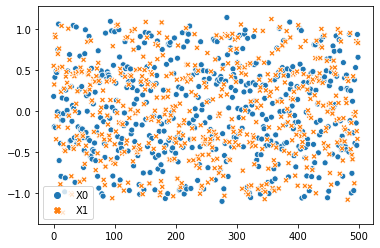

In [137]:
'''Rosmin'''
train_plot = sns.scatterplot(data= X)